In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
import ast

In [65]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [66]:
#replace it with your path
DIR_PATH = "/content/gdrive/MyDrive/Data_Mining_2023/books_1_Best_Books_Ever.csv"

In [67]:
df = pd.read_csv(DIR_PATH)

In [68]:
df.shape

(52478, 25)

In [69]:
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [70]:
df['title'].head()

0                             The Hunger Games
1    Harry Potter and the Order of the Phoenix
2                        To Kill a Mockingbird
3                          Pride and Prejudice
4                                     Twilight
Name: title, dtype: object

##Pre processing (10%)

In [71]:
# Determine length of list
input_string = df['ratingsByStars'].iat[0]
input_numbers = ast.literal_eval(input_string)
length = len(input_numbers) #length of list  

In [72]:
# Create new dataframe columns based on the length of list
new_col_names = [];
for number in range(1,length+1):
  new_col_names.append("ratingsByStars" + str(number))
new_col_names

['ratingsByStars1',
 'ratingsByStars2',
 'ratingsByStars3',
 'ratingsByStars4',
 'ratingsByStars5']

In [73]:
array_of_lists = [[]for _ in range(5)]

In [74]:
len(df[df['ratingsByStars'] == '[]'])

1423

In [75]:
# Add data to lists
for all_ratings in df['ratingsByStars']:
  ratings = ast.literal_eval(all_ratings)
  if(len(ratings) == 0):
    # if there are no ratings whatsoever
    # just add zeros
    # it was checked that the list of ratings are either 5 or 0
    for number in range(0,length):
      array_of_lists[number].append('0')
  else: 
    stars = 0
    for ratings_per_stars in ratings:
      array_of_lists[stars].append(ratings_per_stars)
      stars+=1

In [76]:
# add data to new columns
df['ratingsByStars1'] = array_of_lists[0]
df['ratingsByStars2'] = array_of_lists[1]
df['ratingsByStars3'] = array_of_lists[2]
df['ratingsByStars4'] = array_of_lists[3]
df['ratingsByStars5'] = array_of_lists[4]

In [77]:
def getFirstValue(given_str,):
  s = ast.literal_eval(given_str)
  if(len(s)==0):
    return ''
  return s[0]

## Seperate genre's list adding the first value to a unique column called genreSingle 

In [78]:
df['genreSingle'] = df.apply(lambda x: getFirstValue(x['genres']) ,axis=1)

## publishDate column to provide year of publish
## MM/DD/YY

In [79]:
df['publishDate'].head(20)

0     09/14/08
1     09/28/04
2     05/23/06
3     10/10/00
4     09/06/06
5     03/14/06
6     04/28/96
7     09/16/02
8     09/25/12
9     04/01/99
10    01/10/12
11    06/23/07
12    10/07/64
13    10/28/02
14    03/28/06
15    11/22/05
16    06/01/04
17    12/01/00
18    02/04/03
19    03/03/87
Name: publishDate, dtype: object

In [80]:
df['publishDate'] = pd.to_datetime(df['publishDate'], format='%m/%d/%y', errors='coerce')
df['publishDate'].dropna()

0     2008-09-14
1     2004-09-28
2     2006-05-23
3     2000-10-10
4     2006-09-06
         ...    
815   2005-09-22
816   2001-02-01
817   2006-09-01
818   2014-10-07
819   2010-04-27
Name: publishDate, Length: 818, dtype: datetime64[ns]

In [81]:
df['publishYear'] = df.apply(lambda x: str(x['publishDate'].year) ,axis=1)

In [82]:
df['publishYear'].head(5)

0    2008
1    2004
2    2006
3    2000
4    2006
Name: publishYear, dtype: object

## Questions 1-10

### Question 1

<Axes: >

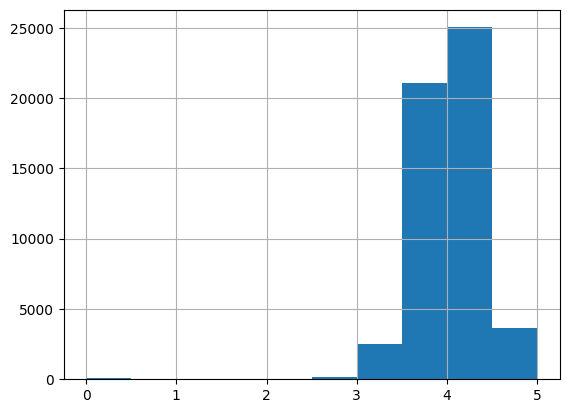

In [83]:
df['rating'].hist()

### Question 2

In [84]:
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')

In [85]:
top_10_books = (df.nlargest(10, "pages"))

In [86]:
top_10_books = top_10_books[['title', 'pages']]

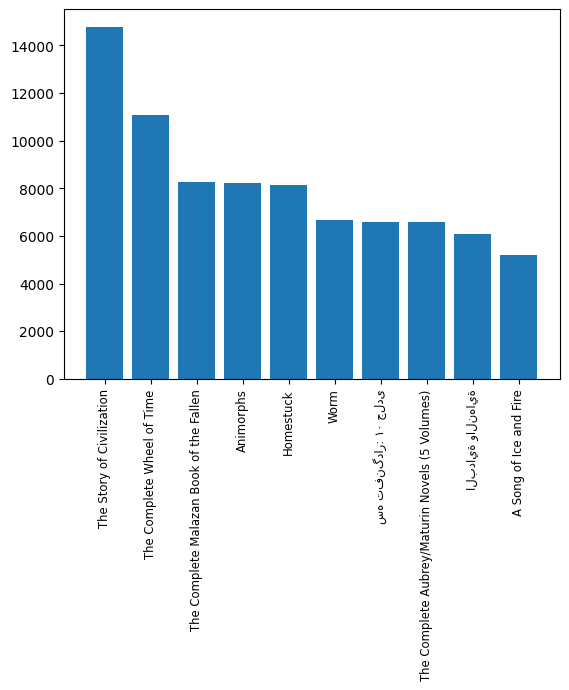

In [87]:
import matplotlib.pyplot as plt
plt.bar(range(len(top_10_books['pages'])), top_10_books['pages'], align='center')
plt.xticks(range(len(top_10_books['title'])), top_10_books['title'], size='small', rotation=90)
plt.show()

### Question 3

In [88]:
temp_df = df[['ratingsByStars5', 'title']].copy()

In [89]:
temp_df['ratingsByStars5'] = pd.to_numeric(temp_df['ratingsByStars5'], errors='coerce')

In [90]:
top_10_books_5stars = (temp_df.nlargest(10, "ratingsByStars5"))

### Top 10 books with most 5 star ratings

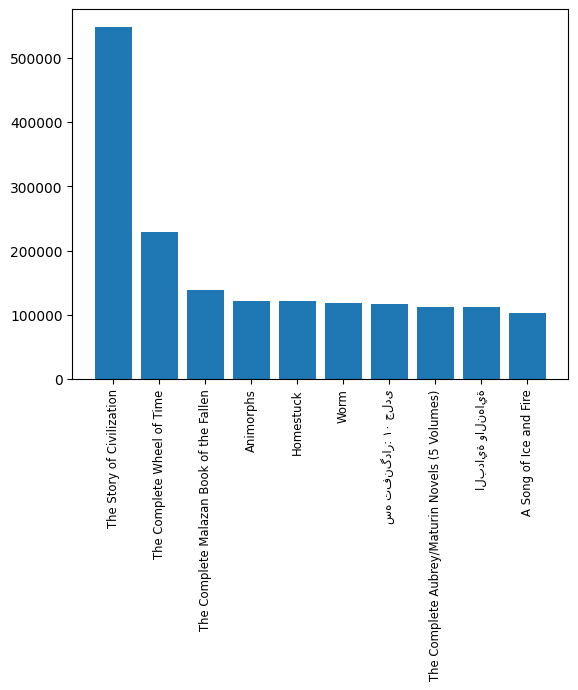

In [91]:
import matplotlib.pyplot as plt
plt.bar(range(len(top_10_books_5stars['ratingsByStars5'])), top_10_books_5stars['ratingsByStars5'], align='center')
plt.xticks(range(len(top_10_books['title'])), top_10_books['title'], size='small', rotation=90)
plt.show()

### Top books with more than 10.000 5-star ratings

In [92]:
top_books_5stars_over100000 = top_10_books_5stars[top_10_books_5stars.ratingsByStars5 > 10000]

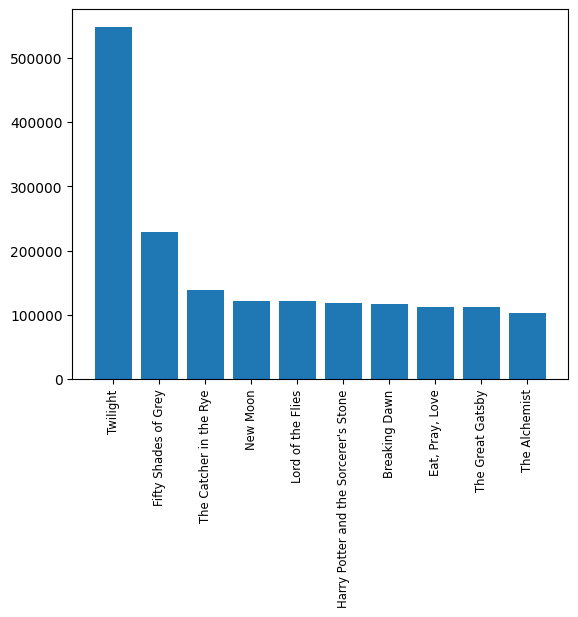

In [93]:
import matplotlib.pyplot as plt
plt.bar(range(len(top_books_5stars_over100000['ratingsByStars5'])), top_books_5stars_over100000['ratingsByStars5'], align='center')
plt.xticks(range(len(top_books_5stars_over100000['title'])), top_books_5stars_over100000['title'], size='small', rotation=90)
plt.show()

## Question 4

In [94]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Remove stopwords

In [95]:
stop = stopwords.words('english')
temp_df = df[['title']].copy()
temp_df['title'] = temp_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Count occurences

In [96]:
from collections import Counter
top_20_most_common_words = Counter(" ".join(temp_df['title']).split()).most_common(20)

### Build dataframe to plot

In [97]:
top_20_most_common_words_df = pd.DataFrame(top_20_most_common_words, columns =['word', 'score'])

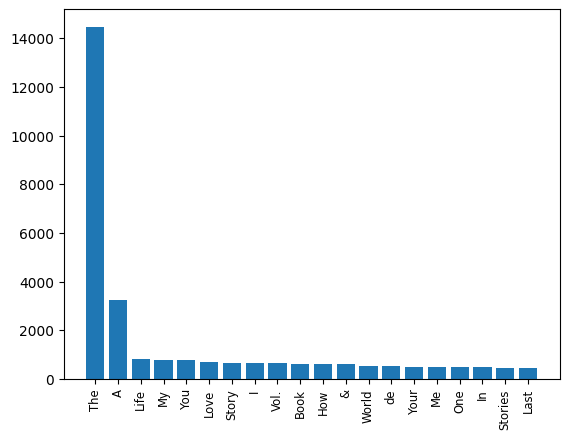

In [98]:
import matplotlib.pyplot as plt
plt.bar(range(len(top_20_most_common_words_df['score'])), top_20_most_common_words_df['score'], align='center')
plt.xticks(range(len(top_20_most_common_words_df['word'])), top_20_most_common_words_df['word'], size='small', rotation=90)
plt.show()

## Question 5

In [99]:
# find top 10 authors with most published books
top_authors_most_published_books = df['author'].value_counts().nlargest(10)

In [100]:
top_authors_most_published_books

Nora Roberts (Goodreads Author)       86
Agatha Christie                       72
Stephen King (Goodreads Author)       66
Erin Hunter                           59
Bella Forrest (Goodreads Author)      53
Meg Cabot (Goodreads Author)          52
Lucian Bane (Goodreads Author)        49
Karen Kingsbury (Goodreads Author)    48
Terry Pratchett                       48
NOT A BOOK                            47
Name: author, dtype: int64

In [101]:
# Convert series to dataframe
top_authors_most_published_books_df = pd.DataFrame({'name':top_authors_most_published_books.index, 'booksPublished':top_authors_most_published_books.values})

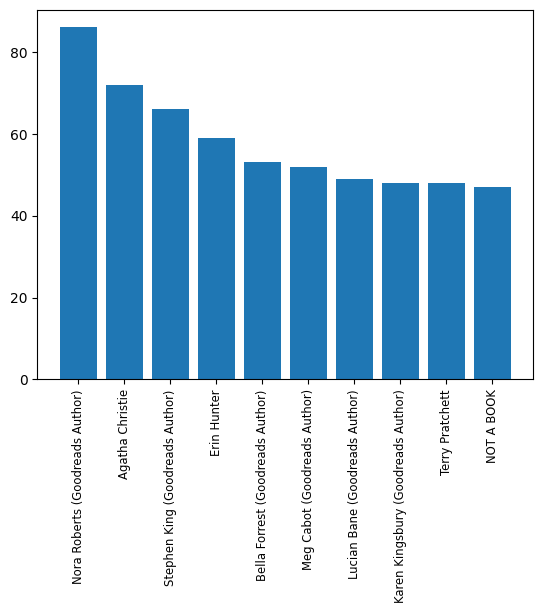

In [102]:
import matplotlib.pyplot as plt
plt.bar(range(len(top_authors_most_published_books_df['booksPublished'])), top_authors_most_published_books_df['booksPublished'], align='center')
plt.xticks(range(len(top_authors_most_published_books_df['name'])), top_authors_most_published_books_df['name'], size='small', rotation=90)
plt.show()

## Reccommendation System

In [103]:
df.shape

(52478, 32)

In [104]:
# Only "English"
recommendations_df = df[df['language'] == "English"].copy()
recommendations_df = recommendations_df[["bookId","description", "title"]]

In [105]:
recommendations_df = recommendations_df.dropna()

In [106]:
recommendations_df

,bookId,description,title
0,2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,The Hunger Games
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Harry Potter and the Order of the Phoenix
2,2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,To Kill a Mockingbird
3,1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Pride and Prejudice
4,41865.Twilight,About three things I was absolutely positive.\...,Twilight
...,...,...,...
52473,11492014-fractured,The Fateful Trilogy continues with Fractured. ...,Fractured
52474,11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Anasazi
52475,10815662-marked,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,Marked
52476,11330278-wayward-son,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,Wayward Son


## Text preproccessing

In [107]:
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer()
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
stop=set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def lowercase(text):
  return text.lower()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
# text cleaning affects bigram a lot to the point of struggling to find actual similar books
# You can clean text for unigram, it works
#recommendations_df['description']=recommendations_df['description'].apply(lowercase)
#recommendations_df['description']=recommendations_df['description'].apply(remove_special_characters)
#recommendations_df['description']=recommendations_df['description'].apply(remove_stopwords)

In [109]:
recommendations_df

,bookId,description,title
0,2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,The Hunger Games
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Harry Potter and the Order of the Phoenix
2,2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,To Kill a Mockingbird
3,1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Pride and Prejudice
4,41865.Twilight,About three things I was absolutely positive.\...,Twilight
...,...,...,...
52473,11492014-fractured,The Fateful Trilogy continues with Fractured. ...,Fractured
52474,11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Anasazi
52475,10815662-marked,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,Marked
52476,11330278-wayward-son,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,Wayward Son


In [110]:
recommendations_df.dropna(
    axis=0,
    how='any',
    subset=None,
    inplace=True
)

### Decreasing the size of the dataset in order not to run out of RAM

In [111]:
recommendations_df = recommendations_df[:20000]

In [112]:
recommendations_df

,bookId,description,title
0,2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,The Hunger Games
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Harry Potter and the Order of the Phoenix
2,2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,To Kill a Mockingbird
3,1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Pride and Prejudice
4,41865.Twilight,About three things I was absolutely positive.\...,Twilight
...,...,...,...
23357,70236.Running_Wild,The thirty-two adult members of an exclusive r...,Running Wild
23363,36613747-how-to-change-your-mind,Could psychedelic drugs change our worldview? ...,How to Change Your Mind: What the New Science ...
23364,36421604-the-other-woman,She was his best-kept secret …In an isolated v...,The Other Woman
23366,29633584-the-protection-of-ren-crown,"Barely surviving her first term at college, al...",The Protection of Ren Crown


In [113]:
recommendations_df = recommendations_df.dropna()
recommendations_df = recommendations_df.drop_duplicates()

In [114]:
recommendations_df

,bookId,description,title
0,2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,The Hunger Games
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Harry Potter and the Order of the Phoenix
2,2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,To Kill a Mockingbird
3,1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Pride and Prejudice
4,41865.Twilight,About three things I was absolutely positive.\...,Twilight
...,...,...,...
23357,70236.Running_Wild,The thirty-two adult members of an exclusive r...,Running Wild
23363,36613747-how-to-change-your-mind,Could psychedelic drugs change our worldview? ...,How to Change Your Mind: What the New Science ...
23364,36421604-the-other-woman,She was his best-kept secret …In an isolated v...,The Other Woman
23366,29633584-the-protection-of-ren-crown,"Barely surviving her first term at college, al...",The Protection of Ren Crown


### Unigram Recommendation System

In [115]:
""" 
corpus = [
...     'This is the first document.',
...     'This document is the second document.',
...     'And this is the third one.',
...     'Is this the first document?',
... ]
that is the corpus style we are aiming for 
"""
# n_gram = (1,1) 
n_gram = (2,2) #for bigram
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

corpus = list(recommendations_df['description'].copy())
tfIdfVectorizer=TfidfVectorizer(use_idf=True, ngram_range = n_gram)
tfIdf = tfIdfVectorizer.fit_transform(corpus)

In [116]:
print(tfIdf.shape)

(20000, 998845)


In [117]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim=cosine_similarity(tfIdf, tfIdf)

In [118]:
cosine_sim.shape

(20000, 20000)

In [119]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=recommendations_df['bookId'].values, columns=recommendations_df['bookId'])

In [120]:
cosine_sim_df

bookId,2767052-the-hunger-games,2.Harry_Potter_and_the_Order_of_the_Phoenix,2657.To_Kill_a_Mockingbird,1885.Pride_and_Prejudice,41865.Twilight,19063.The_Book_Thief,170448.Animal_Farm,11127.The_Chronicles_of_Narnia,30.J_R_R_Tolkien_4_Book_Boxed_Set,18405.Gone_with_the_Wind,...,46006841-becoming-miss-izzy,13007738-niv-study-bible-personal-size,671934.Death_s_Jest_Book,40589790-the-memory-house,22012290-lords-of-the-sith,70236.Running_Wild,36613747-how-to-change-your-mind,36421604-the-other-woman,29633584-the-protection-of-ren-crown,39218044-small-fry
2767052-the-hunger-games,1.000000,0.004716,0.003886,0.003670,0.000000,0.003695,0.000000,0.002553,0.001895,0.001030,...,0.003131,0.001266,0.00428,0.007089,0.002840,0.000827,0.002293,0.003096,0.002068,0.002246
2.Harry_Potter_and_the_Order_of_the_Phoenix,0.004716,1.000000,0.001604,0.001047,0.000000,0.002815,0.005623,0.008276,0.007057,0.002171,...,0.004088,0.001828,0.00000,0.000715,0.011476,0.001743,0.006277,0.007982,0.005476,0.000298
2657.To_Kill_a_Mockingbird,0.003886,0.001604,1.000000,0.005397,0.004936,0.005589,0.016641,0.003987,0.006095,0.001092,...,0.000373,0.001755,0.00000,0.007039,0.002479,0.000877,0.010120,0.001959,0.000000,0.005522
1885.Pride_and_Prejudice,0.003670,0.001047,0.005397,1.000000,0.000000,0.009858,0.022778,0.004623,0.002794,0.000630,...,0.000000,0.001276,0.00000,0.001650,0.003435,0.000506,0.001952,0.002394,0.002694,0.000336
41865.Twilight,0.000000,0.000000,0.004936,0.000000,1.000000,0.000000,0.000000,0.002872,0.000000,0.000000,...,0.003017,0.000000,0.00000,0.000000,0.000000,0.000000,0.003990,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70236.Running_Wild,0.000827,0.001743,0.000877,0.000506,0.000000,0.000404,0.000457,0.004822,0.002861,0.002524,...,0.000563,0.001092,0.00000,0.002795,0.007248,1.000000,0.001139,0.002622,0.005057,0.000000
36613747-how-to-change-your-mind,0.002293,0.006277,0.010120,0.001952,0.003990,0.002195,0.005028,0.003230,0.004800,0.001419,...,0.001990,0.002309,0.00000,0.003165,0.009176,0.001139,1.000000,0.006922,0.004606,0.002669
36421604-the-other-woman,0.003096,0.007982,0.001959,0.002394,0.000000,0.008528,0.002262,0.007245,0.011499,0.003266,...,0.004244,0.004479,0.00000,0.011763,0.009385,0.002622,0.006922,1.000000,0.002295,0.003093
29633584-the-protection-of-ren-crown,0.002068,0.005476,0.000000,0.002694,0.000000,0.006244,0.000273,0.001406,0.001710,0.003942,...,0.007435,0.001189,0.00000,0.001226,0.001495,0.005057,0.004606,0.002295,1.000000,0.005763


In [121]:
cosine_sim_df.iloc[0]

bookId
2767052-the-hunger-games                       1.000000
2.Harry_Potter_and_the_Order_of_the_Phoenix    0.004716
2657.To_Kill_a_Mockingbird                     0.003886
1885.Pride_and_Prejudice                       0.003670
41865.Twilight                                 0.000000
                                                 ...   
70236.Running_Wild                             0.000827
36613747-how-to-change-your-mind               0.002293
36421604-the-other-woman                       0.003096
29633584-the-protection-of-ren-crown           0.002068
39218044-small-fry                             0.002246
Name: 2767052-the-hunger-games, Length: 20000, dtype: float64

In [122]:
cosine_sim_df_top_100 = cosine_sim_df.apply(lambda x: x.nlargest(100).index.values)

In [123]:
cosine_sim_df_top_100.head()

bookId,2767052-the-hunger-games,2.Harry_Potter_and_the_Order_of_the_Phoenix,2657.To_Kill_a_Mockingbird,1885.Pride_and_Prejudice,41865.Twilight,19063.The_Book_Thief,170448.Animal_Farm,11127.The_Chronicles_of_Narnia,30.J_R_R_Tolkien_4_Book_Boxed_Set,18405.Gone_with_the_Wind,...,46006841-becoming-miss-izzy,13007738-niv-study-bible-personal-size,671934.Death_s_Jest_Book,40589790-the-memory-house,22012290-lords-of-the-sith,70236.Running_Wild,36613747-how-to-change-your-mind,36421604-the-other-woman,29633584-the-protection-of-ren-crown,39218044-small-fry
0,2767052-the-hunger-games,2.Harry_Potter_and_the_Order_of_the_Phoenix,2657.To_Kill_a_Mockingbird,1885.Pride_and_Prejudice,41865.Twilight,19063.The_Book_Thief,170448.Animal_Farm,11127.The_Chronicles_of_Narnia,30.J_R_R_Tolkien_4_Book_Boxed_Set,18405.Gone_with_the_Wind,...,46006841-becoming-miss-izzy,13007738-niv-study-bible-personal-size,671934.Death_s_Jest_Book,40589790-the-memory-house,22012290-lords-of-the-sith,70236.Running_Wild,36613747-how-to-change-your-mind,36421604-the-other-woman,29633584-the-protection-of-ren-crown,39218044-small-fry
1,20349441-sampler-only,5.Harry_Potter_and_the_Prisoner_of_Azkaban,24817626-go-set-a-watchman,5899779-pride-and-prejudice-and-zombies,6638377-nightlight,2165.The_Old_Man_and_the_Sea,22842304-kerri-s-war,17915542-netherworld,33.The_Lord_of_the_Rings,11277218-i-am-half-sick-of-shadows,...,347151.Understood_Betsy,20749.Study_Bible,6936382-anna-and-the-french-kiss,799158.Fool_Me_Once,11099729-darth-plagueis,36223860-artificial-condition,51660.Food_of_the_Gods,31371230-house-of-spies,24740030-the-awakening-of-ren-crown,9681425-jim-butcher-box-set
2,7260188-mockingjay,10.Harry_Potter_Collection,17369334-the-search,74788.Mr_Darcy_Presents_His_Bride,690926.The_Twilight_Collection,17333230-the-luminaries,43325.Nothing_Lasts_Forever,55792.The_Magician_s_Nephew_The_Lion_The_Witch...,17157681-the-hobbit-part-one,18309803-unmade,...,1009305.Thank_You_Lucky_Stars,5031805-esv-study-bible,44109461-the-dark-web-murders,9712492-providence,40604754-heir-to-the-empire,9317452-rivers-of-london,17978489-the-future-of-the-mind,17607716-ruins,20911450-seeker,6216670-so-not-happening
3,7938275-the-hunger-games-trilogy-boxset,65112.The_End,576666._And_Ladies_of_the_Club,37562415-broken-circle,26860475-twilight-life-and-death,80369.Discipline_and_Punish,42670801-the-speed-of-life,1781673.The_First_Judgement,15241.The_Two_Towers,1503274.Rhett_Butler_s_People,...,15746.One_Door_Away_from_Heaven,53948.Holy_Bible,4453371-kitty-and-the-dead-man-s-hand,59.The_Changeling_Sea,1347837.Rule_of_Two,2224813.The_Survivors,6037263-the-esp-enigma,93802.A_Death_in_Vienna,42594754-love-by-chance,6400090-the-last-song
4,6148028-catching-fire,34330645-the-naturalist,66414.Gitanjali,99297.Mr_Darcy_s_Diary,8726744-the-twilight-saga-complete-collection,42932.Whirlwind,5472.Animal_Farm_1984,17033173-a-pale-horse,7329.Unfinished_Tales_of_N_menor_and_Middle_Earth,21947191-filthy-beautiful-lies,...,3427390-sentence-of-marriage,23473570-kjv-study-bible,2054504.The_Outcast,17408922-sacrifice,359826.The_Followers,49353.The_Last_Coyote,41818.Robot_Dreams,93801.The_Confessor,114122.The_Circle_trilogy,799158.Fool_Me_Once


## Recommendation System

In [124]:
book_title = "Harry Potter and the Order of the Phoenix"

In [125]:
def get_bookId_from_title(title):
  return recommendations_df[recommendations_df.title == title].bookId

def get_title_from_bookId(id):
  print("Recommended: %s" % (recommendations_df.loc[recommendations_df["bookId"] == id[0]]['title'].values[0]))

def get_description_from_bookId(id):
  print("Description: %s" % (df.loc[df["bookId"] == id[0]]['description'].values[0]))

def get_cosine_similarity(idCmp, idAsk):
  print("(score: %s) " % (cosine_sim_df.loc[cosine_sim_df.index == idAsk.values[0]][idCmp].values[0]))

def recommend_me_some_books(book_title, n):
  print("Recommending 5 books similar to: %s" % (book_title))
  print("---------------------------------------------------------")
  book_index = get_bookId_from_title(book_title)
  top100 = cosine_sim_df_top_100[book_index][1:]
  i = 0
  for value in top100.values:
    get_title_from_bookId(value)
    get_description_from_bookId(value)
    get_cosine_similarity(value, book_index)
    print("\n\n")
    i += 1
    if i == n:
      break

In [126]:
recommend_me_some_books(book_title, 5)

Recommending 5 books similar to: Harry Potter and the Order of the Phoenix
---------------------------------------------------------
Recommended: Harry Potter and the Prisoner of Azkaban
Description: Harry Potter's third year at Hogwarts is full of new dangers. A convicted murderer, Sirius Black, has broken out of Azkaban prison, and it seems he's after Harry. Now Hogwarts is being patrolled by the dementors, the Azkaban guards who are hunting Sirius. But Harry can't imagine that Sirius or, for that matter, the evil Lord Voldemort could be more frightening than the dementors themselves, who have the terrible power to fill anyone they come across with aching loneliness and despair. Meanwhile, life continues as usual at Hogwarts. A top-of-the-line broom takes Harry's success at Quidditch, the sport of the Wizarding world, to new heights. A cute fourth-year student catches his eye. And he becomes close with the new Defense of the Dark Arts teacher, who was a childhood friend of his father

#Classification

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
classification_df = df[["bookId", "description","genreSingle"]].copy()

In [ ]:
classification_df

,bookId,description,genreSingle
0,2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Fantasy
2,2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,Classics
3,1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Classics
4,41865.Twilight,About three things I was absolutely positive.\...,Young Adult
...,...,...,...
52473,11492014-fractured,The Fateful Trilogy continues with Fractured. ...,Vampires
52474,11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery
52475,10815662-marked,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,Fantasy
52476,11330278-wayward-son,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,Fiction


In [ ]:
classification_df.drop(classification_df.index[df['genreSingle'] == ''], inplace = True)

In [ ]:
# save books that are of one of the 10 most common genres
top_10_genres = classification_df['genreSingle'].value_counts().nlargest(10).index

In [ ]:
top_10_genres

Index(['Fiction', 'Fantasy', 'Romance', 'Young Adult', 'Nonfiction',
       'Historical Fiction', 'Mystery', 'Science Fiction', 'Classics',
       'History'],
      dtype='object')

In [ ]:
classification_top_10_df = classification_df.loc[classification_df['genreSingle'].isin(top_10_genres.to_list())]

In [ ]:
classification_top_10_df = classification_top_10_df.dropna()

In [ ]:
classification_top_10_df['description']=classification_top_10_df['description'].apply(lowercase)
classification_top_10_df['description']=classification_top_10_df['description'].apply(remove_special_characters)
classification_top_10_df['description']=classification_top_10_df['description'].apply(remove_stopwords)

In [ ]:
classification_top_10_df

,bookId,description,genreSingle
0,2767052-the-hunger-games,winning means fame fortunelosing means certain...,Young Adult
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,door end silent corridor haunting harry pottte...,Fantasy
2,2657.To_Kill_a_Mockingbird,unforgettable novel childhood sleepy southern ...,Classics
3,1885.Pride_and_Prejudice,alternate cover edition isbn 9780679783268sinc...,Classics
4,41865.Twilight,three things absolutely positive first edward ...,Young Adult
...,...,...,...
52471,12464361-elemental,seventeenyearold kara nightingale suddenly str...,Fantasy
52472,12395883-unbelievable,lilah lopez dresers town take care unfinished ...,Romance
52474,11836711-anasazi,anasazi sequel thirteenth chime emma michaels ...,Mystery
52475,10815662-marked,readers favorite awards winner 2011sixteen yea...,Fantasy


In [ ]:
def vectorize(description):
    words = description.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(250)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
def for_input(data):
  ret = []
  for review in data:
    total = np.zeros(D_in,)
    count = 0
    for word in review.split():
      if word in w2v_dict:
        count+=1
        total = np.add(total, np.array(w2v_dict[word], dtype=np.float32))
    ret.append(words_vecs.mean(axis=0))
  return ret

In [ ]:
import gensim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

descriptions = [sentence.split() for sentence in classification_top_10_df['description']]
w2v_model = gensim.models.Word2Vec(descriptions,min_count=4,vector_size=250, workers=4)

In [ ]:
X = classification_top_10_df.drop('genreSingle', axis=1).copy()
Y = pd.DataFrame(columns=['genre'])
Y['genre'] = classification_top_10_df['genreSingle']

In [ ]:
test_df = None

In [ ]:
from sklearn.model_selection import train_test_split
#split data to train set and validation set
if test_df is None:
  X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
else:
  X_train = X
  Y_train = Y

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-06-04 13:12:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-06-04 13:12:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-04 13:12:13--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd

glove_input_file = 'glove.6B.300d.txt'
w2v_output_file = 'glv_with_w2v_format.txt'

glove2word2vec(glove_input_file, w2v_output_file)
D_in = 300

<ipython-input-27-3a95ca72c5f8>:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, w2v_output_file)


In [ ]:
with open(w2v_output_file, 'r', encoding='cp437') as infile:
    w2v_model = infile.read().splitlines()

w2v_dict = {}

for word_vector_pair in w2v_model:
    word_vector_pair = word_vector_pair.split()
    word = word_vector_pair[0]
    vector = word_vector_pair[1:]
    w2v_dict.update({word: vector})

In [ ]:
X_train = X_train['description'].apply(lambda x: vectorize(x))
X_val = X_val['description'].apply(lambda x: vectorize(x))

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#### Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(list(X_train))
X_val_scaled = scaler.fit_transform(list(X_val))

In [ ]:
# see performance on validation 
model_naive = MultinomialNB()
model_naive.fit(list(X_train_scaled), Y_train.values.ravel())

MultinomialNB()

In [ ]:
y_train_pred = model_naive.predict(list(X_train_scaled))
y_pred = model_naive.predict(list(X_val_scaled))
  
# comparing real values with predicted values  
print("Train accuracy(in %):", metrics.accuracy_score(Y_train, y_train_pred)*100)
print("Validation accuracy(in %):", metrics.accuracy_score(Y_val, y_pred)*100)

Train accuracy(in %): 35.50159517901454
Validation accuracy(in %): 38.86230728335992


In [ ]:
Y_val.values.ravel()

array(['Fantasy', 'Nonfiction', 'History', ..., 'Romance', 'Nonfiction',
       'Mystery'], dtype=object)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

accuracy = accuracy_score(Y_val.values.ravel(),y_pred)
precision = precision_score(Y_val.values.ravel(), y_pred, average='micro')
recall = recall_score(Y_val.values.ravel(), y_pred, average='micro')
f1 = f1_score(Y_val.values.ravel(), y_pred, average='micro')

mnb = MultinomialNB()
scores = cross_val_score(mnb, X_val_scaled, Y_val.values.ravel(), cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.37699115 0.36637168 0.38053097 0.36879433 0.37411348 0.39184397
 0.35638298 0.37056738 0.39007092 0.35106383]


## Support Vector Machines Classifier

In [ ]:
from sklearn import svm
svc_model = svm.SVC(kernel='rbf').fit(list(X_train), Y_train.values.ravel())
svpred=svc_model.predict(list(X_val))

In [ ]:
# comparing real values with predicted values  
print("Validation accuracy(in %):", metrics.accuracy_score(Y_val, svpred)*100)

Validation accuracy(in %): 57.66436292752082


In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

accuracy = accuracy_score(Y_val.values.ravel(), svpred)
precision = precision_score(Y_val.values.ravel(), svpred, average='micro')
recall = recall_score(Y_val.values.ravel(), svpred, average='micro')
f1 = f1_score(Y_val.values.ravel(), svpred, average='micro')

scores = cross_val_score(svc_model, list(X_val), Y_val.values.ravel(), cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.55929204 0.52743363 0.56283186 0.5141844  0.55673759 0.54787234
 0.53723404 0.57092199 0.5248227  0.5177305 ]


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'gamma':[1, 10]}
clf = GridSearchCV(svc_model, parameters)
clf.fit(list(X_train), Y_train.values.ravel())
GridSearchCV(estimator=svm.SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())

## Random Forests Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
clf = RandomForestClassifier(max_depth=150, n_estimators=150)
clf.fit(list(X_train), Y_train.values.ravel())

RandomForestClassifier(max_depth=150, n_estimators=150)

In [ ]:
random_forest=clf.predict(list(X_val))

In [ ]:
# comparing real values with predicted values  
print("Validation accuracy(in %):", metrics.accuracy_score(Y_val, random_forest)*100)

Validation accuracy(in %): 55.60871876661351
